In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [116]:
import matplotlib.pyplot as plt

In [117]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 2, n_redundant = 0, random_state = 1, n_clusters_per_class = 1, n_informative=2)

In [118]:
X.shape

(100, 2)

In [119]:
y.shape

(100,)

In [120]:
X

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316],
       [-1.18013412,  1.12062155],
       [-0.90731836,  1.06040861],
       [-0.62754626,  1.37661405],
       [ 0.82178321,  1.18947778],
       [-1.20376927,  0.78801845],
       [ 0.77151441,  0.345716  ],
       [-0.493857  ,  1.66752297],
       [ 1.17456965,  0.69211449],
       [ 0.82798737,  0.84806927],
       [ 0.89189141,  0.87699465],
       [ 0.90394545,  0.35413361],
       [ 0.94459507,  1.12641981],
       [ 0.9317172 ,  0.78344054],
       [-0.96853969,  1.27991386],
       [-1.09230828,  0.92686981],
       [-0.68243019,  1.4468218 ],
       [-0.76045809,  0.61363671],
       [-1.1146902 ,  1.13545112],
       [ 1.32970299,  1.58463774],
       [-1.39003042,  0.85771953],
       [ 1.01313574,  1.16777676],
       [ 1.22382712,  1.98519313],
       [-1.20257258,  0.69174373],
       [ 0.96435056,  1.77547698],
       [ 1.02600767,  0.87226739],
       [ 1.10863359,

In [121]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

Text(0.5, 1.0, 'Decision Boundary')

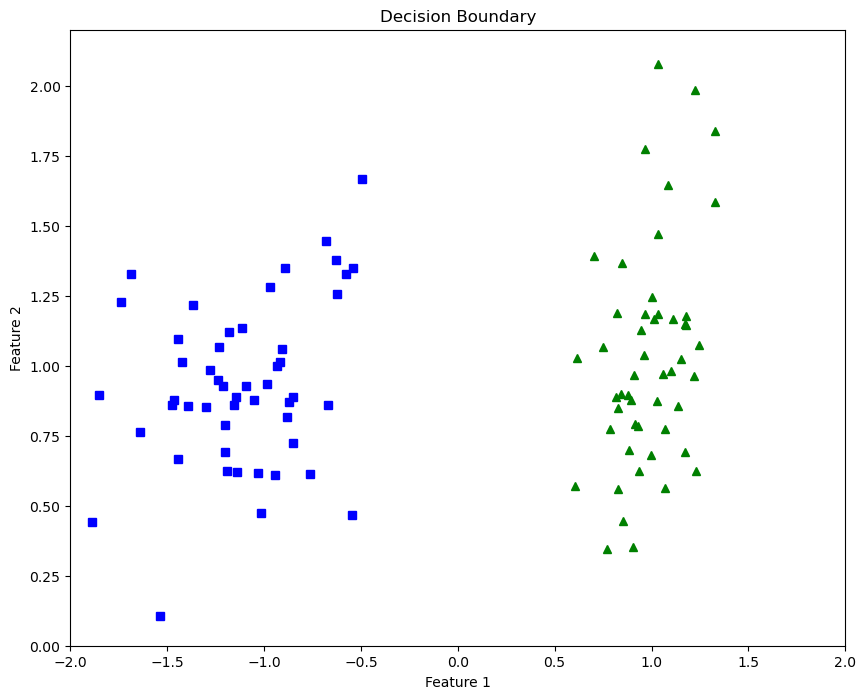

In [122]:
fig = plt.figure(figsize= (10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlim([-2,2])
plt.ylim([0,2.2])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")

## SIGMOID FUNCTION

In [123]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

# LOSS FUNCTION

In [124]:
def loss(y, y_hat):
    los = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))

# GRADIENT

In [125]:
def gradients(X,y,y_hat):
    # X = Input
    # y = true label
    # y_hat = prediction
    # w = weight
    # b = bias
    # m = no of data points
    m = X.shape[0]
    # gradient of loss w.r.t weights
    dw = (1/m)*np.dot(X.T, (y_hat-y))
    # gradient of loss w.r.t bias
    db = (1/m)*np.sum((y_hat-y))
    
    return dw, db

# DECISION BOUNDARY

In [126]:
def plot_decision_boundary(X, w, b):
    # Line => y = mx + c
    # Equate mx+c = wX + b
    # Solve to find m and c
    
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    
    # plotting 
    
    fig = plt.figure(figsize= (10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    
    plt.plot(x1,x2,'y-')

# NORMALIZE

In [127]:
def normalize(X):
    m, n = X.shape
    for i in range(n):  # A B
        X = (X -X.mean(axis = 0))/X.std(axis = 0)
    return X

# TRAIN

In [128]:
def train(X, y, bs, epochs, lr):
    # bs -> batch size
    # epoch = no of iterations
    
    m, n = X.shape
    w = np.zeros((n,1)) # array w 2 elemnts as n = 2
    b = 0
    
    y = y.reshape(m,1)
    
    x = normalize(X)
    
    losses = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs +1): 
            
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            y_hat = sigmoid(np.dot(xb,w)+b)
            
            dw,db = gradients(xb, yb, y_hat)
            
            w -= lr*dw
            b -= lr*db
        l = loss(y, sigmoid(np.dot(x,w)+b))
        losses.append(l)
        
    return w,b, losses

# PREDICTION

In [129]:
def predict(X):
    x = normalize(X)
    preds = sigmoid(np.dot(X,w)+b)
    pred_class = []
    
    pred_class = [1 if i>0.5 else 0 for i in preds]
    
    return np.array(pred_class)

# Training and Plotting DB

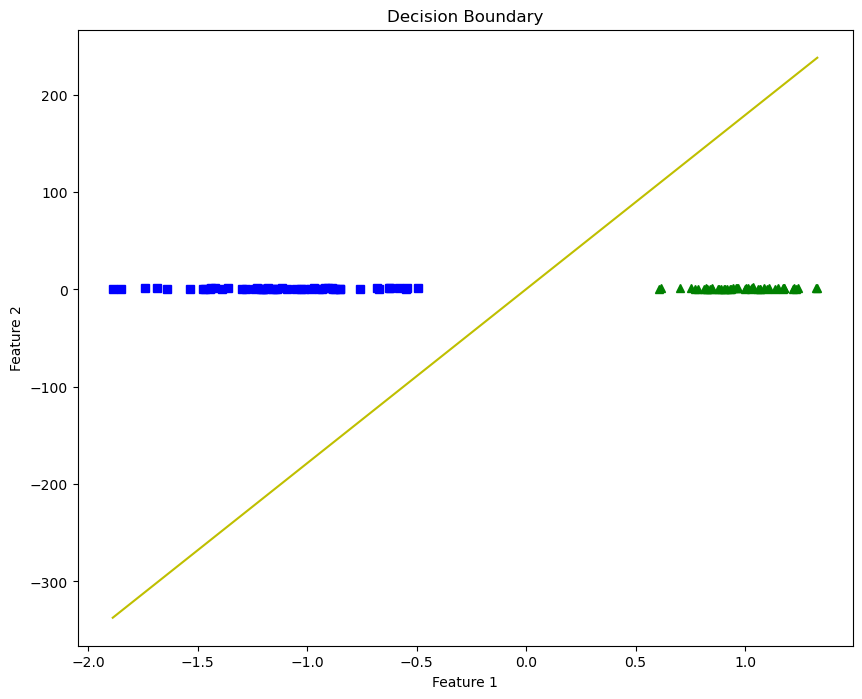

In [130]:
w,b,l = train(X, y, bs = 20, epochs=1000, lr = 0.01)

plot_decision_boundary(X,w,b)

# ACCURACY

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
print(accuracy_score(y,predict(X)))

1.0


In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y,predict(X)))
print(confusion_matrix(y,predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]


# Logistic Regression of Linearly Insparable Data

In [134]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise = 0.1)

Text(0.5, 1.0, 'Decision Boundary')

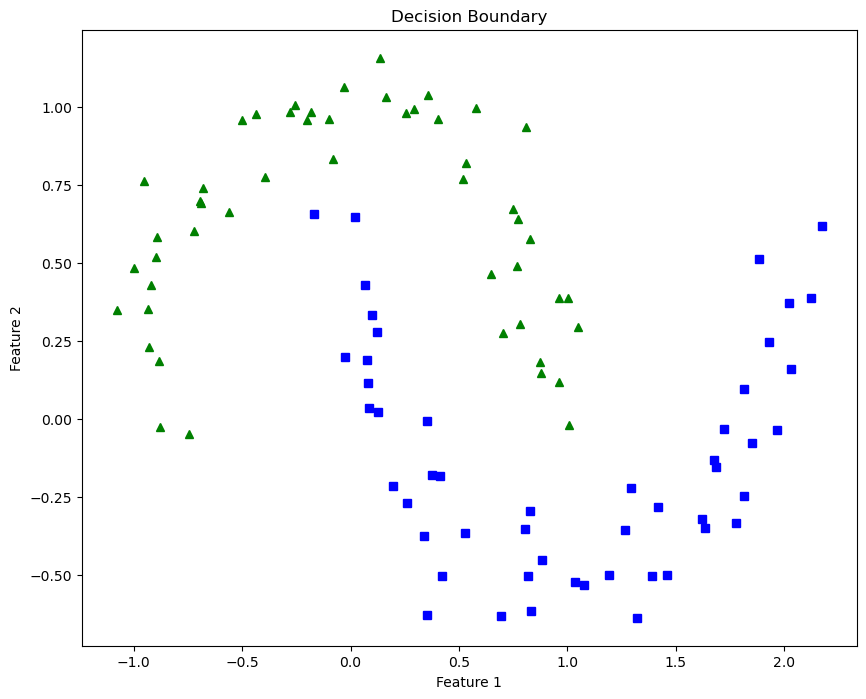

In [135]:
fig = plt.figure(figsize= (10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")

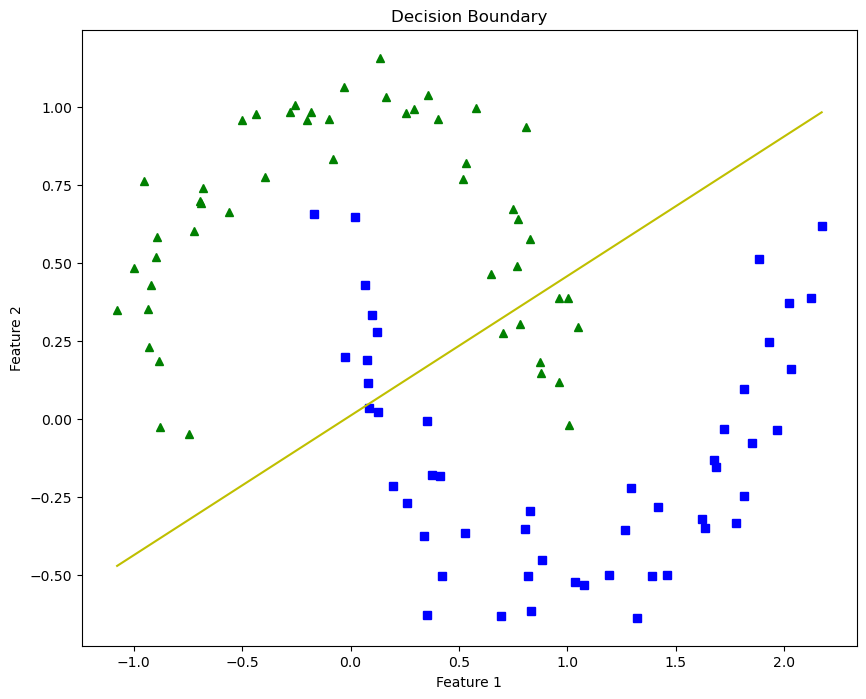

In [136]:
w,b,l = train(X, y, bs = 20, epochs=1000, lr = 0.01)

plot_decision_boundary(X,w,b)

In [137]:
print(accuracy_score(y,predict(X)))

0.83
